#Working data with Python

##Métodos comunes:

La idea es crear un objeto con la información de un archivo.

*   open - obtiene el objeto
*   name - regresa el nombre del archivo
*   mode - regresa el modo (read o write)
*   close - cierra el objeto
*   read - lee el objeto dentro de with
*   readlines - lee línea por línea
*   readline - sólo lee la primer línea
*   file.readlines(5) - lee los 5 primeros caracteres de la línea 

 


In [ ]:
#EJEMPLOS

from pyodide.http import pyfetch
import pandas as pd

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


await download(filename, "Example1.txt")

# Read the Example1.txt
example1 = "Example1.txt"
file1 = open(example1, "r")

# Print the path of file
file1.name

# Print the mode of file, either 'r' or 'w'
file1.mode

# Read the file
FileContent = file1.read()
FileContent

# Print the file with '\n' as a new line
print(FileContent)

# Type of file content
type(FileContent)

# Close file after finish
file1.close()



##Hay una mejor manera de manipular los archivos
Es mejor usar with, cierra de manera automática el objeto y lee todo el contenido dentro del archivo, siempre y cuando todo este dentro del try.

In [ ]:
# Open file using with

with open(example1, "r") as file1:
    FileContent = file1.read()
    print(FileContent)

# Read first four characters
with open(example1, "r") as file1:
    print(file1.read(4))

#Si se vuelve a mandar llamar el código, se leen las siguientes 4 letras 

# Read certain amount of characters

with open(example1, "r") as file1:
    print(file1.read(4))
    print(file1.read(4))
    print(file1.read(7))
    print(file1.read(15))

#Esta es la salida

#This
# is 
#line 1 

#This is line 2

# Read one line
with open(example1, "r") as file1:
    print("first line: " + file1.readline())
#first line: This is line 1 

# Iterate through the lines
with open(example1,"r") as file1:
        i = 0;
        for line in file1:
            print("Iteration", str(i), ": ", line)
            i = i + 1
#Iteration 0 :  This is line 1 
#Iteration 1 :  This is line 2
#Iteration 2 :  This is line 3

# Read all lines and save as a list
with open(example1, "r") as file1:
    FileasList = file1.readlines()

# Print the first line
FileasList[0]
#'This is line 1 \n'



##Writing files

*   Se usa el objeto open y el argumento 'w'
*   write - metodo para escribir en el docto




In [ ]:
# Write line to file
exmp2 = 'Example2.txt'
with open(exmp2, 'w') as writefile:
    writefile.write("This is line A")

# Read file
with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

# Write lines to file
with open(exmp2, 'w') as writefile:
    writefile.write("This is line A\n")
    writefile.write("This is line B\n")

# Check whether write to file
with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())
#This is line A
#This is line B

Con "w" en el with, se sobreescribe el archivo, pero con "a" se agregan las nuevas líneas

In [ ]:
# Write a new line to text file

with open('Example2.txt', 'a') as testwritefile:
    testwritefile.write("This is line C\n")
    testwritefile.write("This is line D\n")
    testwritefile.write("This is line E\n")

# Verify if the new line is in the text file
with open('Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())


##Notas adicionales
*   r+: reading & writing
*   w+: writing & reading
*   a+: appending & reading




In [ ]:
with open('Example2.txt', 'a+') as testwritefile:
    testwritefile.write("This is line E\n")
    print(testwritefile.read())
#Lo malo es que no da salidas, la locación de memoria cambia todo el tiempo, con el siguiente si jala

with open('Example2.txt', 'a+') as testwritefile:
    print("Initial Location: {}".format(testwritefile.tell()))
    
    data = testwritefile.read()
    if (not data):  #empty strings return false in python
            print('Read nothing') 
    else: 
            print(testwritefile.read())
            
    testwritefile.seek(0,0) # move 0 bytes from beginning.
    
    print("\nNew Location : {}".format(testwritefile.tell()))
    data = testwritefile.read()
    if (not data): 
            print('Read nothing') 
    else: 
            print(data)
    
    print("Location after read: {}".format(testwritefile.tell()) )

Finally, a note on the difference between w+ and r+. Both of these modes allow access to read and write methods, however, opening a file in w+ overwrites it and deletes all pre-existing data.
To work with a file on existing data, use r+ and a+. While using r+, it can be useful to add a .truncate() method at the end of your data. This will reduce the file to your data and delete everything that follows.
In the following code block, Run the code as it is first and then run it with the .truncate().

In [ ]:
with open('Example2.txt', 'r+') as testwritefile:
    data = testwritefile.readlines()
    testwritefile.seek(0,0) #write at beginning of file
   
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("finished\n")
    #Uncomment the line below
    #testwritefile.truncate()
    testwritefile.seek(0,0)
    print(testwritefile.read())

#Sin el truncate
#Line 1
#Line 2
#Line 3
#finished
#is line D
#This is line E
#This is line E


#Con el truncate
#Line 1
#Line 2
#Line 3
#finished

In [ ]:
# Copy file to another
with open('Example2.txt','r') as readfile:
    with open('Example3.txt','w') as writefile:
          for line in readfile:
                writefile.write(line)



#Loading data with PANDAS


*   read_csv - leer un archivo csv
*   read_excel - lee un archivo excel 
*   df.head() - se leen los primeros 5 rows del csv
*   df - dataframe esta compuesto de rows y de columa
*   x = [["artist"]] - sólo lanza los resultados de esta columna
*   df.ix[0, "Artist"] - ver el valor la fila 0 de la columna "Artist"
*   df.ix[0.0] - valor de la primera fila y columna
*   df.ix[0:2, "Artist": "released"] - despliega los valores de las columnas de artist a released de las filas 0 al 2

Se puede crear un dataframe a través de un diccionario, las keys son las columnas





#Saving data with PANDAS

*   df["Released"].unique() - quita los duplicados
*   df["Released"]>= 1980 - lanza si la confición se cumple (True o False)
*   df1 = df[df["Releaded"]>=. 1980] - crea otra tabla con los valores que sumplan a la condición
*   df1.to_csv("new.csv")




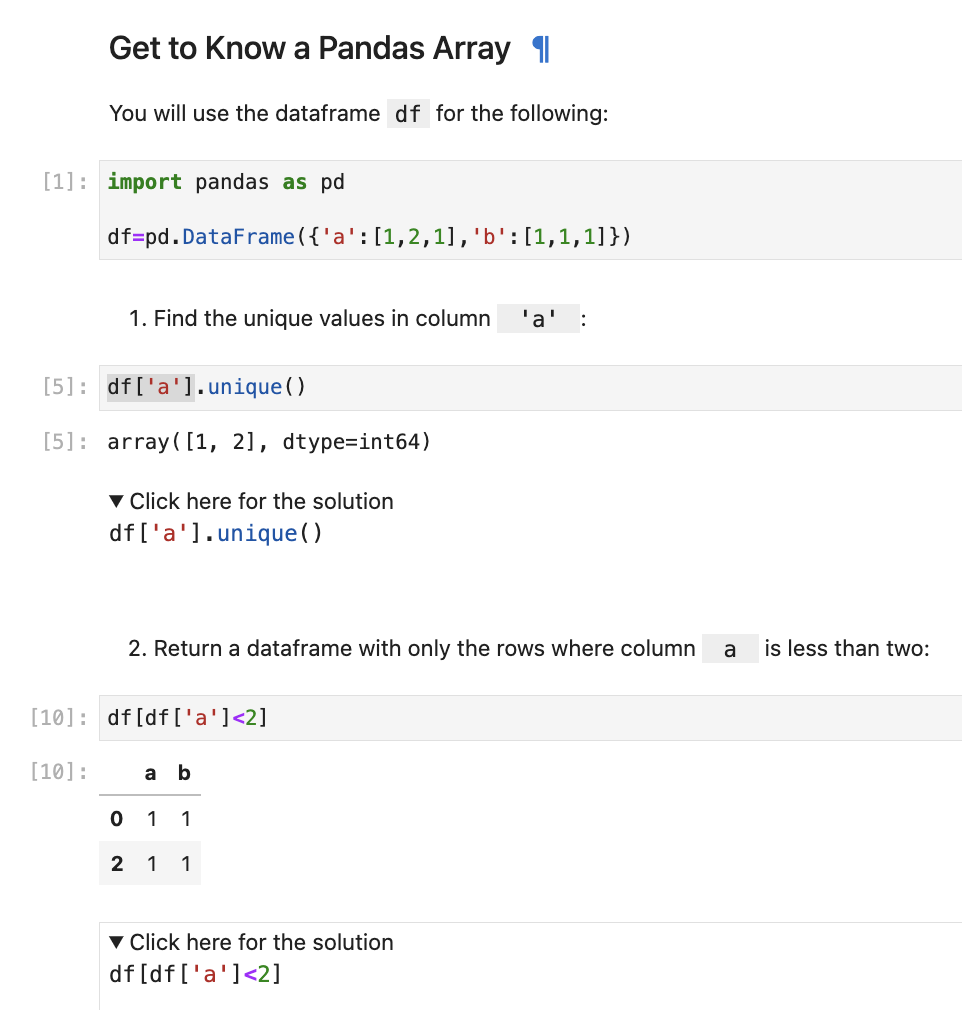

In [ ]:
# One way to access unique elements is the <code>iloc</code> method, where you can access the 1st row and the 1st column as follows:
# Access the value on the first row and the first column
df.iloc[0, 0]

# Access the value on the first row and the third column
df.iloc[0,2]

#Ejemplo del uso de df

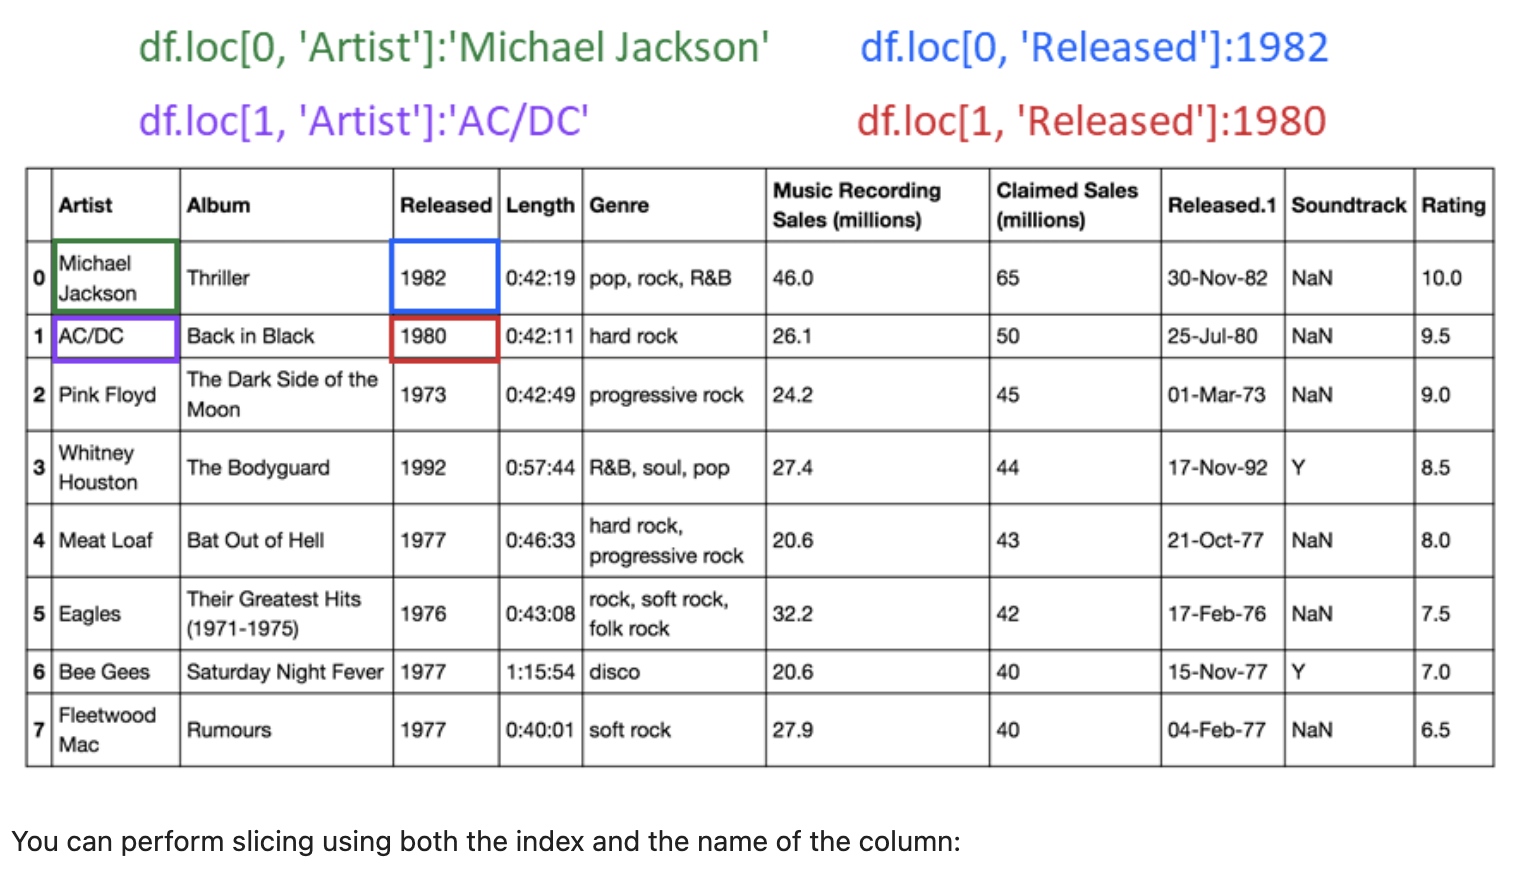

#Ejemplo de la info con la que se trabajará más adelante



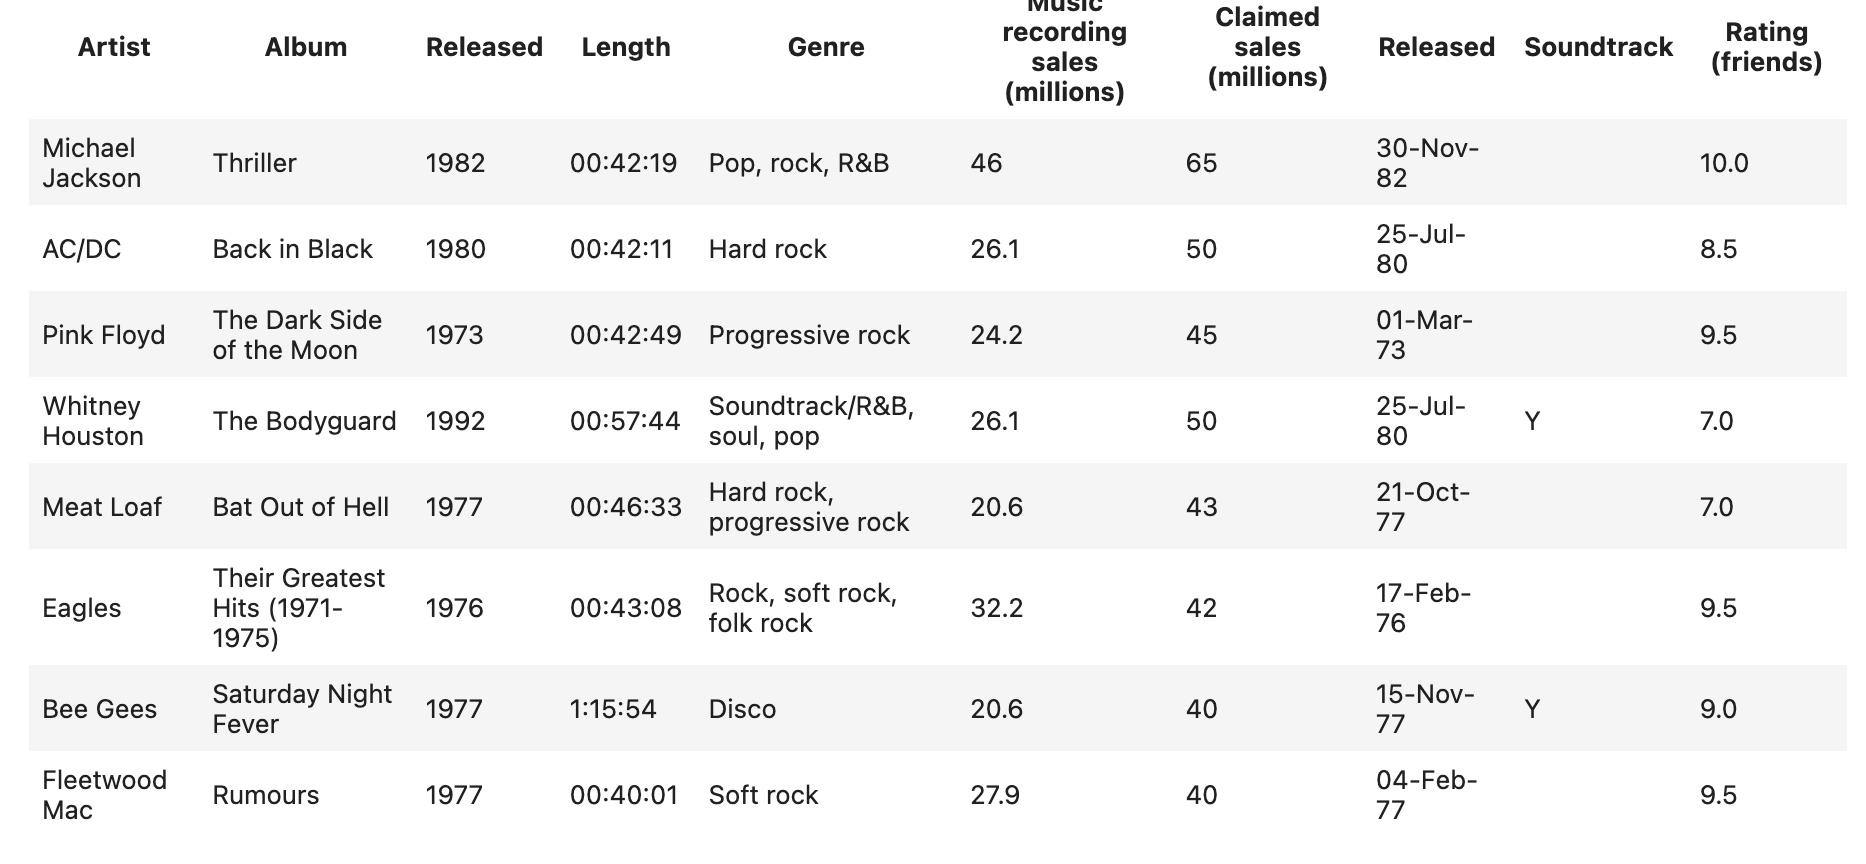

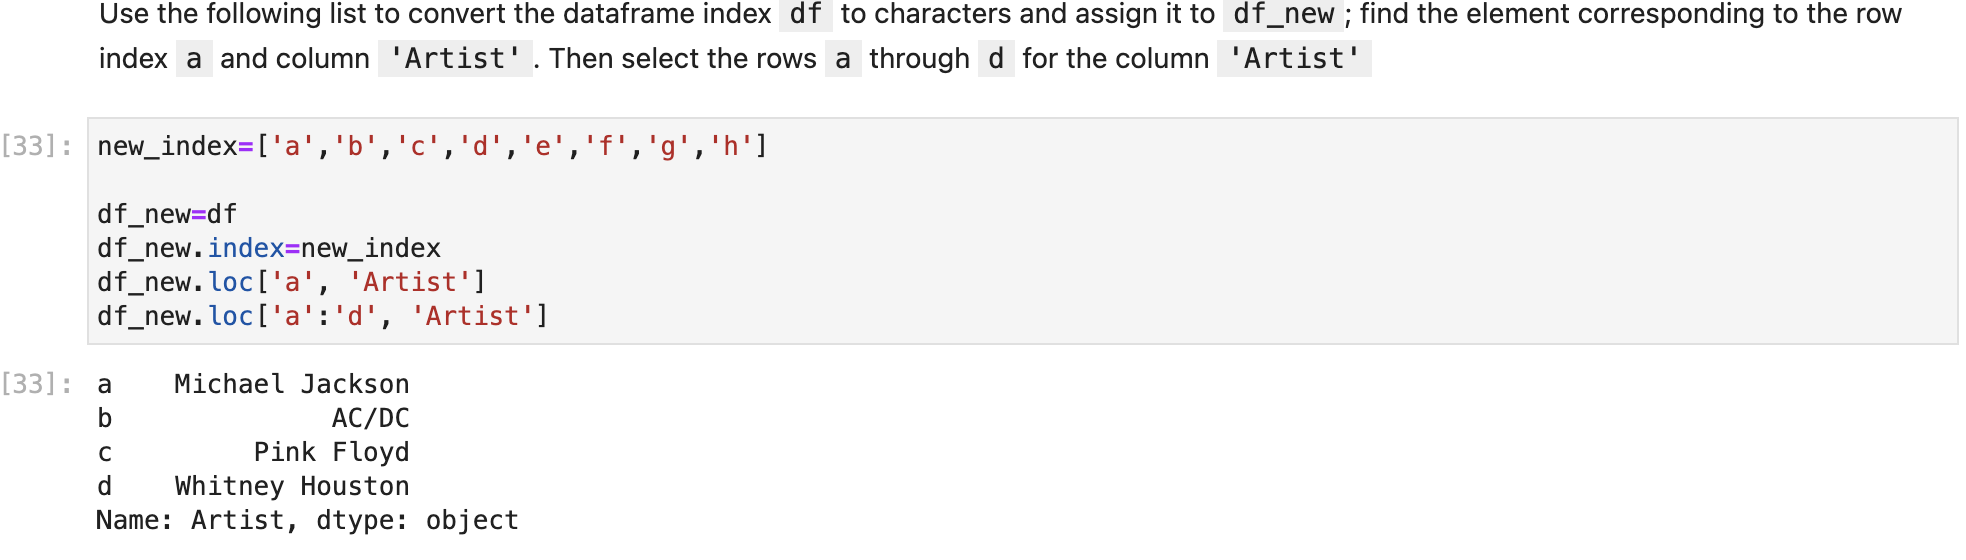

#Diferencias entre iloc, loc e ix

*   **iloc** –  iloc is used for indexing or selecting based on position .i.e. by row number and column number
*   **loc** - loc is used for indexing or selecting based on name .i.e. by row name and column name
*   **ix** - indexing can be done by both position and name using ix.

